# Mean Shift

In mean shift is a hierarchical clustering algorithm in which the machine actually figures out how many clusters exists in the dataset and where these clusters are.

We consider at first all the points as a cluster. Then, we get into something called Radius or Bandwidth. We form a radius around each and every datapoint. For each radius we have some points in the resulting circle formed. We take the mean of all points and then we get new cluster center - then again new bandwidth and so and so - again and again until the cluster center is not moving any more.

[[  0.85085198   0.99927292   1.08947989]
 [  3.28631155  10.38595018  10.14239581]
 [  4.95642494   5.05545342   4.92871746]]
Number of estimated clusters:  3


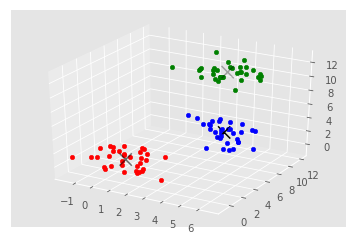

In [9]:
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
style.use('ggplot')

centers = [[1,1,1], [5,5,5], [3,10,10]]
X, _ = make_blobs(n_samples = 100, centers = centers, cluster_std = 1)

ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
print(cluster_centers)

n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters: ", n_clusters_)

colors = 10*['r', 'g', 'b', 'c', 'k', 'y', 'm']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(X)):
    ax.scatter(X[i][0], X[i][1], X[i][2], c=colors[labels[i]], marker='o')
    
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], cluster_centers[:,2],
          marker="x", color='k', s=150, linewidths = 5, zorder=10)

plt.show()

### Applying Mean Shifting on Titanic Dataset

In [17]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.cluster import MeanShift
from sklearn import preprocessing
import pandas as pd

df = pd.read_excel('titanic.xls')
original_df = pd.DataFrame.copy(df)

df.drop(['body', 'name', 'sex', 'ticket', 'boat'], 1, inplace = True)

df.convert_objects(convert_numeric = True)
df.fillna(0, inplace = True)

def handle_non_numerical_data(df):
    columns = df.columns.values
    
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]
        
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
                    
            df[column] = list(map(convert_to_int, df[column]))
            
    return df

df = handle_non_numerical_data(df)

X = np.array(df.drop(['survived'], 1).astype(float))
# X = preprocessing.scale(X)
y = np.array(df['survived'])

clf = MeanShift()
clf.fit(X)

labels = clf.labels_
cluster_centers = clf.cluster_centers_

original_df['cluster_group'] = np.nan

for i in range(len(X)):
    # iloc refers the index of the dataset rows
    original_df['cluster_group'].iloc[i] = labels[i]

n_clusters_ = len(np.unique(labels))

survival_rates = {}
for i in range(n_clusters_):
    temp_df = original_df[(original_df['cluster_group'] == float(i))]
    survival_cluster = temp_df[(temp_df['survived'] == 1)]
    survival_rate = len(survival_cluster)/len(temp_df)
    survival_rates[i] = survival_rate

print(survival_rates)

C:\Users\VIP\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
C:\Users\VIP\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


{0: 0.3337250293772033, 1: 0.40066225165562913, 2: 0.584070796460177, 3: 0.6388888888888888, 4: 0.6666666666666666, 5: 1.0, 6: 1.0}


In [19]:
print(original_df[(original_df['cluster_group'] == 1)])

      pclass  survived                                               name  \
6          1         1                  Andrews, Miss. Kornelia Theodosia   
25         1         0                                Birnbaum, Mr. Jakob   
40         1         0                          Brewe, Dr. Arthur Jackson   
48         1         1   Candee, Mrs. Edward (Helen Churchill Hungerford)   
60         1         0                      Cavendish, Mr. Tyrell William   
61         1         1  Cavendish, Mrs. Tyrell William (Julia Florence...   
70         1         0              Chisholm, Mr. Roderick Robert Crispin   
75         1         0                         Colley, Mr. Edward Pomeroy   
80         1         0                          Crafton, Mr. John Bertram   
87         1         1                        Daniel, Mr. Robert Williams   
91         1         1                            Dick, Mr. Albert Adrian   
92         1         1          Dick, Mrs. Albert Adrian (Vera Gillespie)   

In [20]:
print(original_df[(original_df['cluster_group'] == 2)])

     pclass  survived                                               name  \
12        1         1                      Aubart, Mme. Leontine Pauline   
14        1         1               Barkworth, Mr. Algernon Henry Wilson   
19        1         0                               Beattie, Mr. Thomson   
29        1         1          Bjornstrom-Steffansson, Mr. Mauritz Hakan   
30        1         0                       Blackwell, Mr. Stephen Weart   
33        1         1                           Bonnell, Miss. Elizabeth   
34        1         0                           Borebank, Mr. John James   
36        1         1                        Bowerman, Miss. Elsie Edith   
38        1         0                            Brady, Mr. John Bertram   
42        1         1     Brown, Mrs. John Murray (Caroline Lane Lamson)   
43        1         1    Bucknell, Mrs. William Robert (Emma Eliza Ward)   
45        1         0                  Butt, Major. Archibald Willingham   
54        1 

In [22]:
print(original_df[(original_df['cluster_group'] == 1)].describe())

           pclass    survived         age       sibsp       parch        fare  \
count  302.000000  302.000000  279.000000  302.000000  302.000000  302.000000   
mean     2.215232    0.400662   28.341995    0.605960    0.582781   23.030973   
std      0.659734    0.490846   14.824434    1.069215    1.023690   18.342353   
min      1.000000    0.000000    0.166700    0.000000    0.000000    0.000000   
25%      2.000000    0.000000   19.000000    0.000000    0.000000   10.500000   
50%      2.000000    0.000000   26.000000    0.000000    0.000000   16.950000   
75%      3.000000    1.000000   39.000000    1.000000    1.000000   27.720800   
max      3.000000    1.000000   76.000000    5.000000    6.000000   93.500000   

             body  cluster_group  
count   33.000000          302.0  
mean   162.000000            1.0  
std     96.450441            0.0  
min     17.000000            1.0  
25%     80.000000            1.0  
50%    149.000000            1.0  
75%    259.000000        

In [23]:
print(original_df[(original_df['cluster_group'] == 2)].describe())

           pclass    survived         age       sibsp       parch        fare  \
count  113.000000  113.000000  101.000000  113.000000  113.000000  113.000000   
mean     1.176991    0.584071   36.648515    0.477876    0.274336   52.475444   
std      0.405984    0.495077   15.804832    0.613790    0.630303   29.124911   
min      1.000000    0.000000    1.000000    0.000000    0.000000    7.650000   
25%      1.000000    0.000000   25.000000    0.000000    0.000000   28.712500   
50%      1.000000    1.000000   36.000000    0.000000    0.000000   50.000000   
75%      1.000000    1.000000   47.000000    1.000000    0.000000   75.241700   
max      3.000000    1.000000   80.000000    2.000000    3.000000  136.779200   

             body  cluster_group  
count   12.000000          113.0  
mean   182.166667            2.0  
std     88.507661            0.0  
min     15.000000            2.0  
25%    131.250000            2.0  
50%    198.000000            2.0  
75%    251.250000        

In [24]:
print(original_df[(original_df['cluster_group'] == 3)].describe())

       pclass   survived        age      sibsp      parch        fare  \
count    36.0  36.000000  36.000000  36.000000  36.000000   36.000000   
mean      1.0   0.638889  34.817131   0.944444   1.333333  214.239933   
std       0.0   0.487136  17.857145   0.954521   1.146423   46.939666   
min       1.0   0.000000   0.916700   0.000000   0.000000  134.500000   
25%       1.0   0.000000  22.500000   0.000000   0.000000  153.462500   
50%       1.0   1.000000  34.250000   1.000000   1.000000  221.779200   
75%       1.0   1.000000  47.250000   1.000000   2.000000  262.375000   
max       1.0   1.000000  67.000000   3.000000   4.000000  263.000000   

             body  cluster_group  
count    5.000000           36.0  
mean   109.400000            3.0  
std     40.648493            0.0  
min     45.000000            3.0  
25%     96.000000            3.0  
50%    124.000000            3.0  
75%    135.000000            3.0  
max    147.000000            3.0  


In [25]:
print(original_df[(original_df['cluster_group'] == 4)].describe())

       pclass  survived        age     sibsp  parch      fare  body  \
count     3.0  3.000000   3.000000  3.000000    3.0    3.0000   0.0   
mean      1.0  0.666667  33.666667  0.333333    1.0  247.5208   NaN   
std       0.0  0.577350  14.224392  0.577350    0.0    0.0000   NaN   
min       1.0  0.000000  24.000000  0.000000    1.0  247.5208   NaN   
25%       1.0  0.500000  25.500000  0.000000    1.0  247.5208   NaN   
50%       1.0  1.000000  27.000000  0.000000    1.0  247.5208   NaN   
75%       1.0  1.000000  38.500000  0.500000    1.0  247.5208   NaN   
max       1.0  1.000000  50.000000  1.000000    1.0  247.5208   NaN   

       cluster_group  
count            3.0  
mean             4.0  
std              0.0  
min              4.0  
25%              4.0  
50%              4.0  
75%              4.0  
max              4.0  


In [26]:
print(original_df[(original_df['cluster_group'] == 5)].describe())

       pclass  survived   age  sibsp     parch      fare  body  cluster_group
count     3.0       3.0   3.0    3.0  3.000000    3.0000   0.0            3.0
mean      1.0       1.0  43.0    0.0  0.666667  512.3292   NaN            5.0
std       0.0       0.0  13.0    0.0  0.577350    0.0000   NaN            0.0
min       1.0       1.0  35.0    0.0  0.000000  512.3292   NaN            5.0
25%       1.0       1.0  35.5    0.0  0.500000  512.3292   NaN            5.0
50%       1.0       1.0  36.0    0.0  1.000000  512.3292   NaN            5.0
75%       1.0       1.0  47.0    0.0  1.000000  512.3292   NaN            5.0
max       1.0       1.0  58.0    0.0  1.000000  512.3292   NaN            5.0


In [27]:
print(original_df[(original_df['cluster_group'] == 6)].describe())

       pclass  survived   age  sibsp  parch      fare  body  cluster_group
count     1.0       1.0   1.0    1.0    1.0    1.0000   0.0            1.0
mean      1.0       1.0  35.0    0.0    0.0  512.3292   NaN            6.0
std       NaN       NaN   NaN    NaN    NaN       NaN   NaN            NaN
min       1.0       1.0  35.0    0.0    0.0  512.3292   NaN            6.0
25%       1.0       1.0  35.0    0.0    0.0  512.3292   NaN            6.0
50%       1.0       1.0  35.0    0.0    0.0  512.3292   NaN            6.0
75%       1.0       1.0  35.0    0.0    0.0  512.3292   NaN            6.0
max       1.0       1.0  35.0    0.0    0.0  512.3292   NaN            6.0


In [28]:
print(original_df[(original_df['cluster_group'] == 0)].describe())

           pclass    survived         age       sibsp       parch        fare  \
count  851.000000  851.000000  623.000000  851.000000  851.000000  850.000000   
mean     2.537015    0.333725   29.098448    0.447709    0.286722   23.718695   
std      0.769709    0.471820   13.418201    1.077264    0.780678   31.500012   
min      1.000000    0.000000    0.416700    0.000000    0.000000    0.000000   
25%      2.000000    0.000000   21.000000    0.000000    0.000000    7.854200   
50%      3.000000    0.000000   28.000000    0.000000    0.000000   10.481250   
75%      3.000000    1.000000   36.000000    1.000000    0.000000   25.466700   
max      3.000000    1.000000   74.000000    8.000000    9.000000  227.525000   

             body  cluster_group  
count   71.000000          851.0  
mean   160.267606            0.0  
std    102.549076            0.0  
min      1.000000            0.0  
25%     64.500000            0.0  
50%    169.000000            0.0  
75%    257.500000        

In [29]:
#Survival rate of first class passengers in cluster 0
cluster_0 = original_df[(original_df['cluster_group']==0)]
cluster_0_fc = cluster_0[(cluster_0['pclass']==1)]
cluster_0_fc.describe()

,pclass,survived,age,sibsp,parch,fare,body,cluster_group
count,146.0,146.000000,124.000000,146.000000,146.000000,146.000000,12.000000,146.0
mean,1.0,0.657534,39.338710,0.349315,0.239726,71.503653,143.916667,0.0
std,0.0,0.476168,13.374461,0.519847,0.516016,48.479671,94.030419,0.0
min,1.0,0.000000,16.000000,0.000000,0.000000,0.000000,16.000000,0.0
25%,1.0,0.000000,30.000000,0.000000,0.000000,30.771850,56.000000,0.0
50%,1.0,1.000000,39.000000,0.000000,0.000000,60.389600,145.500000,0.0
75%,1.0,1.000000,49.000000,1.000000,0.000000,90.000000,232.500000,0.0
max,1.0,1.000000,71.000000,2.000000,2.000000,227.525000,269.000000,0.0
